# Import software libraries

In [17]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# Load and preview the data

In [2]:
data = pd.read_pickle("users_data_final.pickle") 
data

,user_id,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,1,0,0,0,0,0,0,...,261,1,-1,0,False,0,0,0,4,8
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,0,1,0,0,0,0,0,...,151,1,-1,0,False,1,0,1,2,7
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,0,0,1,0,0,0,0,...,76,1,-1,0,False,0,0,0,1,6
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,0,0,0,1,0,0,0,...,92,1,-1,0,False,0,1,0,3,6
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,0,0,0,0,0,0,0,...,198,1,-1,0,False,0,0,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,a218c1d6-880a-4431-a314-a1bd3dc36b21,2.0,825.00,0,1,0,0,0,0,0,...,977,3,-1,0,True,1,0,0,3,12
45212,6a6bf402-9416-4e71-97c6-727e8298a3a5,4.0,1729.00,0,0,0,0,1,0,0,...,456,2,-1,0,True,1,0,0,5,11
45213,be32ba96-b178-4b54-b32a-f75b714793df,2.0,5715.00,0,0,0,0,1,0,0,...,1127,5,184,3,True,0,0,0,5,6
45214,44623a48-4e9b-48fd-b155-a17d1c06a754,0.0,1369.42,0,0,0,1,0,0,0,...,508,4,-1,0,False,1,0,0,4,9


# Check the shape of the data

In [3]:
data.shape

(45179, 33)

# Check the data types

In [4]:
data.dtypes

user_id                 object
number_transactions    float64
total_amount_usd       float64
job_management           int64
job_technician           int64
job_entrepreneur         int64
job_blue-collar          int64
job_retired              int64
job_admin.               int64
job_services             int64
job_self-employed        int64
job_unemployed           int64
job_housemaid            int64
job_student              int64
education_tertiary       int64
education_secondary      int64
education_Unknown        int64
education_primary        int64
default                   bool
housing                   bool
loan                      bool
contact_cellular         int64
contact_telephone        int64
duration                 int64
campaign                 int64
pdays                    int64
previous                 int64
term_deposit              bool
device_desktop           int64
device_tablet            int64
single                   uint8
age_group_encoded         int8
month_jo

# Explore the distribution of the target variable

- You need to plot the distribution of the target column (term_deposit) and explain what is the problem of the distribution.

<Axes: xlabel='term_deposit', ylabel='count'>

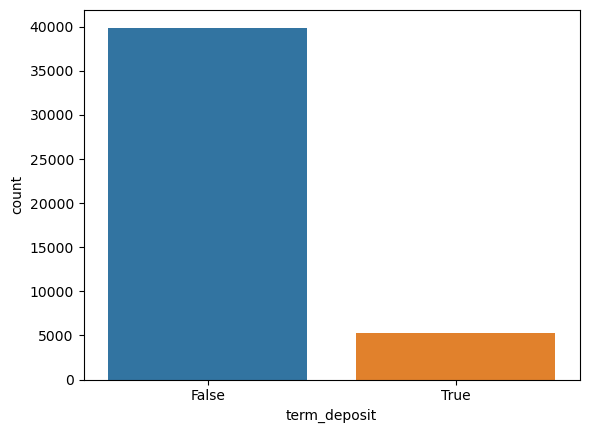

In [5]:
sns.countplot(data, x='term_deposit')

## the True values are way less than the False 

# Apply oversampling or SMOTE to the target label

In [15]:
df = data.drop(columns = ['term_deposit', 'user_id'])

smote = SMOTE()
balenced, term_deposit = smote.fit_resample(df, data['term_deposit'])

<Axes: xlabel='term_deposit', ylabel='count'>

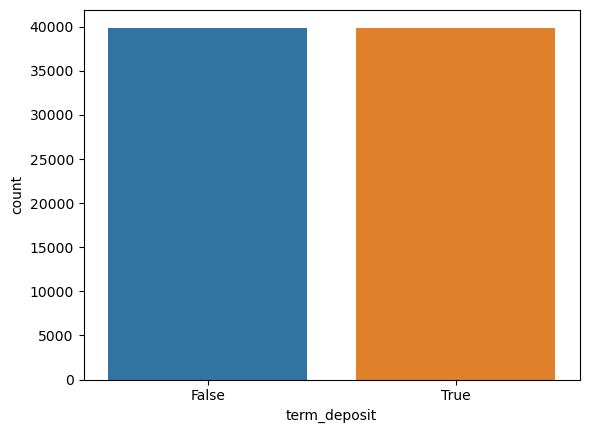

In [16]:
sns.countplot(x=term_deposit)

# Normalize the data

In [20]:
balenced['term_deposit'] = term_deposit
scaler = MinMaxScaler().fit(balenced)
scaled_data = scaler.transform(balenced)
scaled_df = pd.DataFrame(scaled_data, columns=balenced.columns)
scaled_df

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined,term_deposit
0,0.150000,0.092259,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053070,0.000000,0.0,0.0,0.0,0.0,0.0,0.666667,0.636364,0.0
1,0.000000,0.085236,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030704,0.000000,0.0,0.0,1.0,0.0,1.0,0.333333,0.545455,0.0
2,0.100000,0.072822,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.015453,0.000000,0.0,0.0,0.0,0.0,0.0,0.166667,0.454545,0.0
3,0.000000,0.085236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.018707,0.000000,0.0,0.0,0.0,1.0,0.0,0.500000,0.454545,0.0
4,0.050000,0.072812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040260,0.000000,0.0,0.0,0.0,0.0,1.0,0.166667,0.636364,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79783,0.969551,0.070865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.132778,0.000000,0.0,0.0,0.0,0.0,0.0,0.166667,0.363636,1.0
79784,0.116689,0.073681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.145384,0.016129,0.0,0.0,0.0,0.0,0.0,0.166667,0.272727,1.0
79785,0.101113,0.081285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.145384,0.000000,0.0,0.0,0.0,0.0,0.0,0.166667,0.090909,1.0
79786,0.000000,0.085236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031924,0.000000,0.0,0.0,0.0,0.0,1.0,0.166667,0.545455,1.0


# Standardlize the data

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(balenced)
standarizes_data = scaler.fit_transform(balenced)
standarizes_data = pd.DataFrame(standarizes_data, columns=balenced.columns)
standarizes_data

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined,term_deposit
0,0.029065,0.227272,2.425617,-0.345008,-0.138655,-0.388899,-0.185998,-0.276586,-0.239255,-0.143824,...,-0.335084,-0.522075,-0.487707,-0.34112,-0.472915,-0.283818,-0.529662,1.808985,0.539150,-1.0
1,-0.863651,-0.048573,-0.412266,2.898483,-0.138655,-0.388899,-0.185998,-0.276586,-0.239255,-0.143824,...,-0.650707,-0.522075,-0.487707,-0.34112,2.114545,-0.283818,1.887997,-0.010547,0.226251,-1.0
2,-0.268507,-0.536170,-0.412266,-0.345008,7.212162,-0.388899,-0.185998,-0.276586,-0.239255,-0.143824,...,-0.865905,-0.522075,-0.487707,-0.34112,-0.472915,-0.283818,-0.529662,-0.920313,-0.086648,-1.0
3,-0.863651,-0.048573,-0.412266,-0.345008,-0.138655,2.571363,-0.185998,-0.276586,-0.239255,-0.143824,...,-0.819996,-0.522075,-0.487707,-0.34112,-0.472915,3.523387,-0.529662,0.899219,-0.086648,-1.0
4,-0.566079,-0.536527,-0.412266,-0.345008,-0.138655,-0.388899,-0.185998,-0.276586,-0.239255,-0.143824,...,-0.515850,-0.522075,-0.487707,-0.34112,-0.472915,-0.283818,1.887997,-0.920313,0.539150,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79783,4.906572,-0.613016,-0.412266,-0.345008,-0.138655,-0.388899,-0.185998,-0.276586,-0.239255,-0.143824,...,0.789681,-0.522075,-0.487707,-0.34112,-0.472915,-0.283818,-0.529662,-0.920313,-0.399547,1.0
79784,-0.169181,-0.502414,-0.412266,-0.345008,-0.138655,-0.388899,-0.185998,-0.276586,-0.239255,-0.143824,...,0.967578,-0.131788,-0.487707,-0.34112,-0.472915,-0.283818,-0.529662,-0.920313,-0.712447,1.0
79785,-0.261882,-0.203760,-0.412266,-0.345008,-0.138655,-0.388899,-0.185998,-0.276586,-0.239255,-0.143824,...,0.967578,-0.522075,-0.487707,-0.34112,-0.472915,-0.283818,-0.529662,-0.920313,-1.338245,1.0
79786,-0.863651,-0.048573,-0.412266,-0.345008,-0.138655,-0.388899,-0.185998,-0.276586,-0.239255,-0.143824,...,-0.633492,-0.522075,-0.487707,-0.34112,-0.472915,-0.283818,1.887997,-0.920313,0.226251,1.0


# Plot the PCA

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(standarizes_data)
pd.Series(pca.explained_variance_ratio_) 

0     0.072555
1     0.064459
2     0.060092
3     0.049915
4     0.045302
5     0.041562
6     0.037338
7     0.036415
8     0.035366
9     0.034259
10    0.033277
11    0.032921
12    0.032303
13    0.032162
14    0.031900
15    0.030957
16    0.030601
17    0.028964
18    0.028894
19    0.028303
20    0.026362
21    0.026084
22    0.024704
23    0.023172
24    0.022104
25    0.019189
26    0.017672
27    0.015595
28    0.014166
29    0.013968
30    0.006097
31    0.003342
dtype: float64

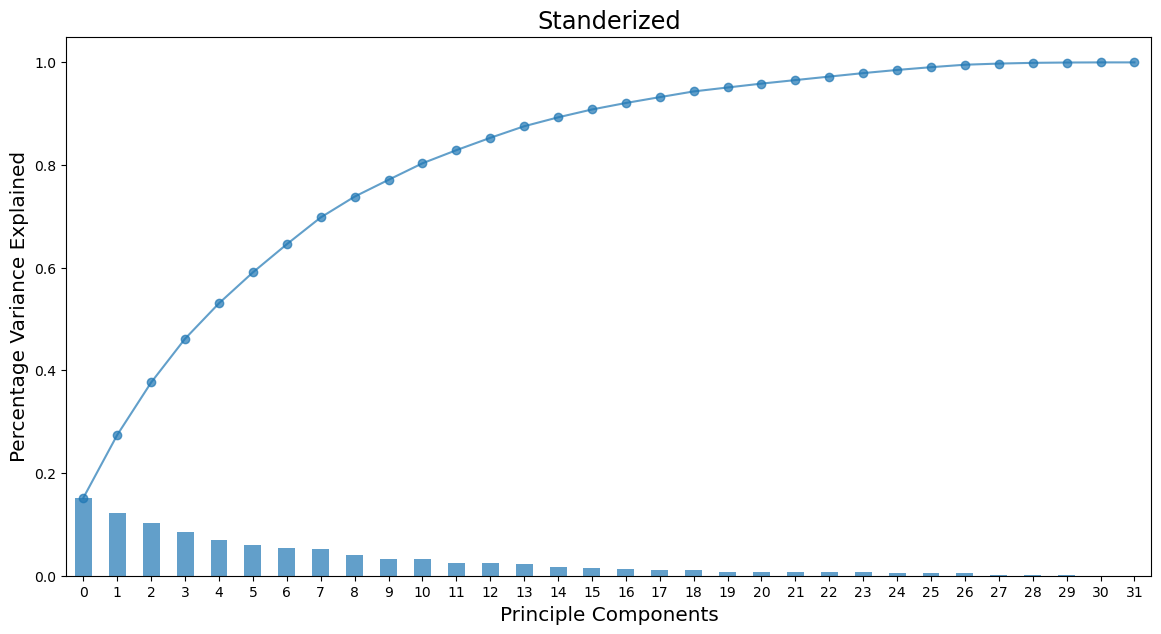

In [27]:
plt.figure(figsize=(14,7))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7)

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7)
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Standerized", fontsize="xx-large")
plt.show();

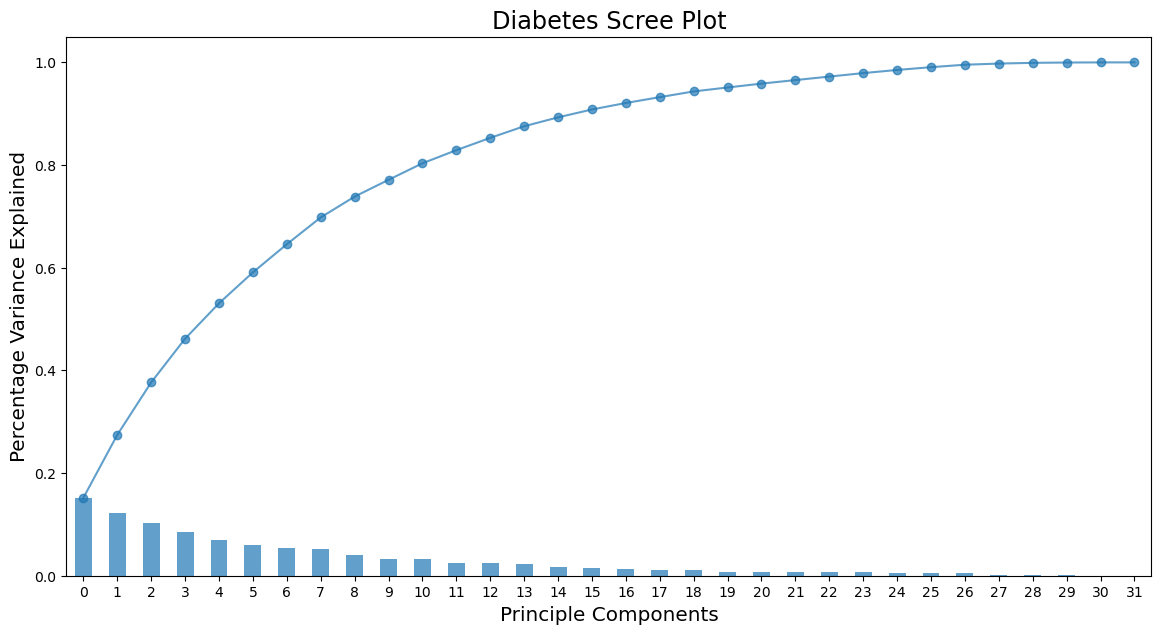

In [26]:
pca = PCA()
pca.fit(scaled_df)
pd.Series(pca.explained_variance_ratio_) 

plt.figure(figsize=(14,7))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7)

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7)
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Normalized", fontsize="xx-large")
plt.show();